In [1]:
import sys
print(sys.version)

import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d'))

3.5.4 |Anaconda custom (x86_64)| (default, Sep 21 2017, 18:03:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
2018-01-01


In [2]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [3]:
plt.style.available

['seaborn-colorblind',
 'seaborn-talk',
 'bmh',
 'seaborn-deep',
 '_classic_test',
 'ggplot',
 'seaborn-dark-palette',
 'dark_background',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-poster',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'grayscale',
 'seaborn-pastel',
 'seaborn-dark',
 'seaborn-white',
 'seaborn',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'classic']

In [4]:
plt.style.use('seaborn-poster')

## Get historical data for bitcoin

In [5]:
def daily_price_historical(symbol, comparison_symbol, limit=1, aggregate=1, exchange='', allData='true'):
    url = 'https://min-api.cryptocompare.com/data/histoday?fsym={}&tsym={}&limit={}&aggregate={}&allData={}'\
            .format(symbol.upper(), comparison_symbol.upper(), limit, aggregate, allData)
    if exchange:
        url += '&e={}'.format(exchange)
    page = requests.get(url)
    data = page.json()['Data']
    df = pd.DataFrame(data)
    df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
    return df

In [6]:
df = daily_price_historical('BTC', 'USD', limit=1e6, aggregate=1, exchange='', allData='true')

In [7]:
df.head()

,close,high,low,open,time,volumefrom,volumeto,timestamp
0,0.04951,0.04951,0.04951,0.04951,1279324800,20.00,0.9902,2010-07-16 20:00:00
1,0.08584,0.08585,0.05941,0.04951,1279411200,75.01,5.0900,2010-07-17 20:00:00
2,0.08080,0.09307,0.07723,0.08584,1279497600,574.00,49.6600,2010-07-18 20:00:00
3,0.07474,0.08181,0.07426,0.08080,1279584000,262.00,20.5900,2010-07-19 20:00:00
4,0.07921,0.07921,0.06634,0.07474,1279670400,575.00,42.2600,2010-07-20 20:00:00


In [8]:
import matplotlib as mpl

In [9]:
df.columns

Index(['close', 'high', 'low', 'open', 'time', 'volumefrom', 'volumeto',
       'timestamp'],
      dtype='object')

In [10]:
_df = df[df['close'] != 0]

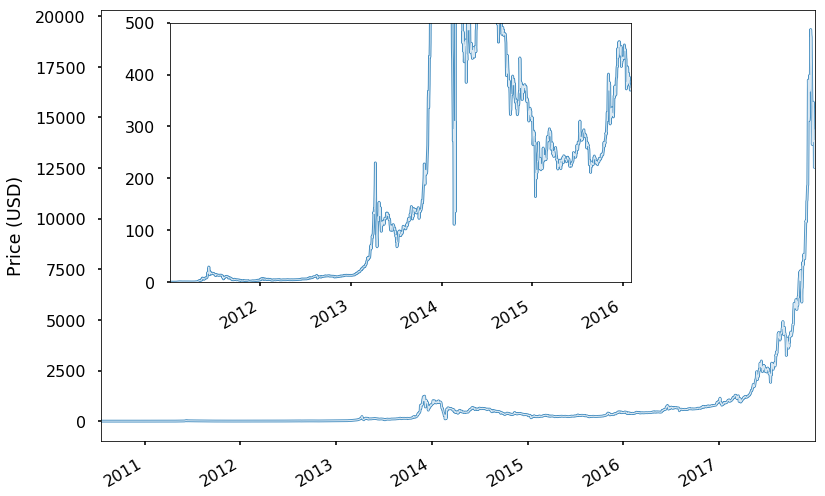

In [11]:
fig, ax = plt.subplots()

_df.plot('timestamp', 'close', alpha=0.8, ax=ax, legend=False)
_df.plot('timestamp', 'close', alpha=0.8, ax=ax, legend=False, linewidth=1, color='white')


left, bottom, width, height = [0.20, 0.45, 0.5, 0.41]
ax_inset = fig.add_axes([left, bottom, width, height])
_df[(_df.timestamp > datetime.datetime.strptime('2011-01-01', '%Y-%m-%d'))&(_df.timestamp < datetime.datetime.strptime('2016-02-01', '%Y-%m-%d'))]\
    .plot('timestamp', 'close', alpha=0.8, ax=ax_inset, legend=False)
ax_inset.set_ylim(0, 500)
_df[(_df.timestamp > datetime.datetime.strptime('2011-01-01', '%Y-%m-%d'))&(_df.timestamp < datetime.datetime.strptime('2016-02-01', '%Y-%m-%d'))]\
    .plot('timestamp', 'close', alpha=0.8, ax=ax_inset, legend=False, linewidth=0.8, color='white')
ax_inset.set_xlabel('')


ax.set_ylabel('Price (USD)', labelpad=10)
ax.set_xlabel('')

plt.savefig('btcusd-price-history.png', bbox_inches='tight', dpi=300)

## Label each timeframe

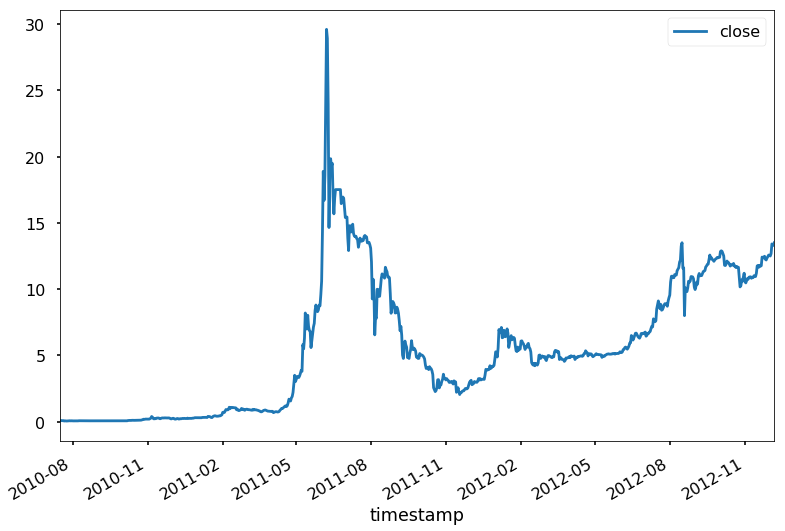

In [12]:
bubble_1_start = datetime.datetime.strptime('2010-01-01', '%Y-%m-%d')
df[(df.timestamp>bubble_1_start)
    &(df.timestamp<datetime.datetime.strptime('2012-12-07', '%Y-%m-%d'))].plot('timestamp', 'close')

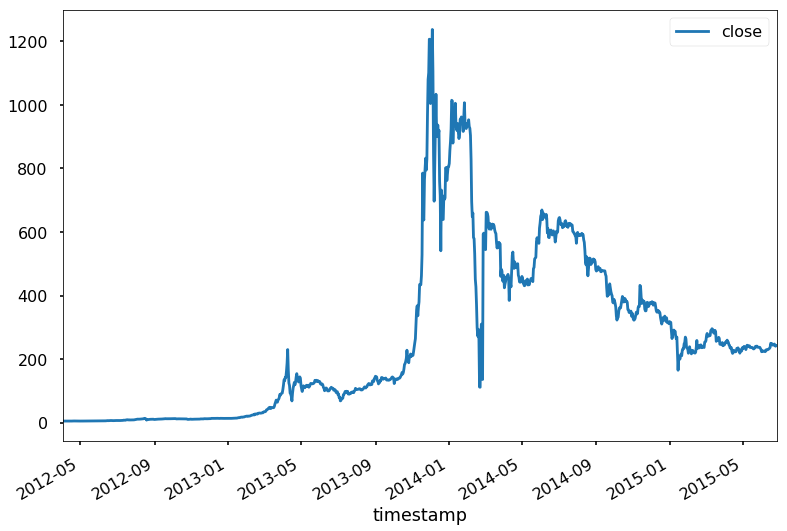

In [13]:
bubble_2_start = datetime.datetime.strptime('2012-04-01', '%Y-%m-%d')
df[(df.timestamp>bubble_2_start)
      &(df.timestamp<datetime.datetime.strptime('2015-06-26', '%Y-%m-%d'))].plot('timestamp', 'close')

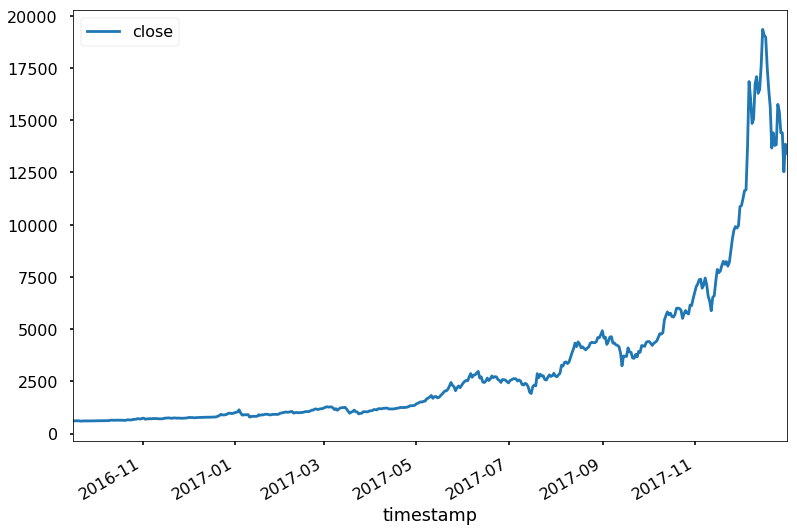

In [14]:
bubble_now_start = datetime.datetime.strptime('2016-09-15', '%Y-%m-%d')
df[(df.timestamp>bubble_now_start)].plot('timestamp', 'close')

In [15]:
# pad start of dataframe with zero-value entries
_df = pd.DataFrame(np.zeros((2000, len(df.columns))), columns=df.columns)
_df['timestamp'] = pd.date_range(end='2010-07-15', periods=2000)
df = pd.concat((_df, df))

# next steps
#  - try to find good match on the upper run up (i.e. bounce to 100k per BTC next year)

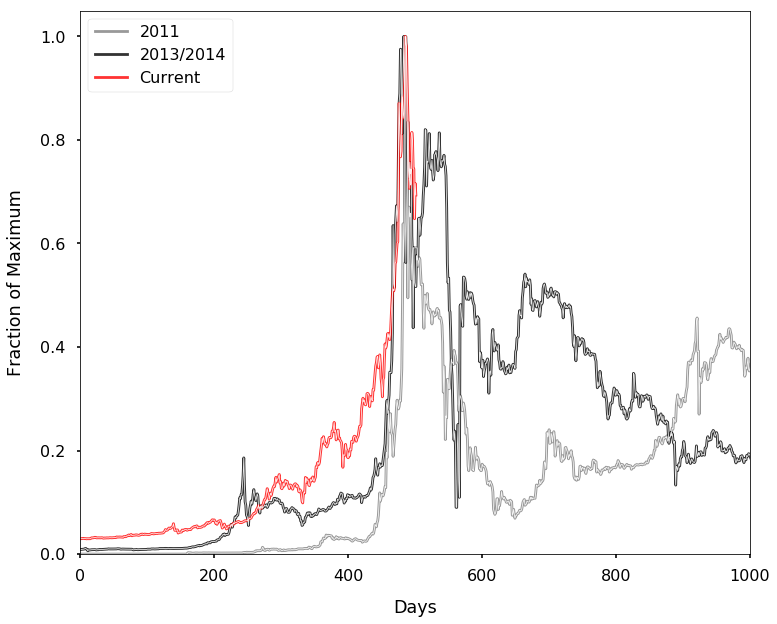

In [16]:
bubble_1_start = datetime.datetime.strptime('2009-07-20', '%Y-%m-%d')
bubble_2_start = datetime.datetime.strptime('2012-01-20', '%Y-%m-%d')
bubble_now_start = datetime.datetime.strptime('2016-01-30', '%Y-%m-%d')

df['bubble_1'] = (df.timestamp>bubble_1_start)
df['bubble_2'] = (df.timestamp>bubble_2_start)
df['bubble_now'] = (df.timestamp>bubble_now_start)

bubble_1_max = df[(df.timestamp>bubble_1_start)
    &(df.timestamp<datetime.datetime.strptime('2012-12-07', '%Y-%m-%d'))].close.max()
bubble_2_max = df[(df.timestamp>bubble_2_start)
      &(df.timestamp<datetime.datetime.strptime('2015-06-26', '%Y-%m-%d'))].close.max()
bubble_now_max = df.close.max()

x_min = 200
x_max = 1000

y1 = (df[df.bubble_1].close / bubble_1_max).values
y2 = (df[df.bubble_2].close / bubble_2_max).values
y3 = (df[df.bubble_now].close / bubble_now_max).values

fig = plt.figure(figsize=(12, 10))

alpha = 0.8

ax = fig.add_subplot(111)
plt.plot(list(np.arange(-x_min, -x_min+len(y1))), y1, label='2011', alpha=alpha, color='grey')
plt.plot(list(np.arange(-x_min, -x_min+len(y2))), y2, label='2013/2014', alpha=alpha, color='black')
plt.plot(list(range(-x_min, -x_min+len(y3))), y3, label='Current', alpha=alpha, color='red')

plt.plot(list(np.arange(-x_min, -x_min+len(y1))), y1, label='', alpha=0.9, color='white', linewidth=0.8)
plt.plot(list(np.arange(-x_min, -x_min+len(y2))), y2, label='', alpha=0.9, color='white', linewidth=0.8)
plt.plot(list(range(-x_min, -x_min+len(y3))), y3, label='', alpha=0.9, color='white', linewidth=0.8)

plt.xlim(0, x_max)
ax.set_xlabel('Days', labelpad=15)
plt.ylim(0, 1.05)
ax.set_ylabel('Fraction of Maximum', labelpad=15)
plt.legend(loc='upper left')
plt.savefig('day-by-day-peak-compare.png', bbox_inches='tight', dpi=300)
plt.show()

# ADD ANNOTATIONS INSTEAD OF DATES

In [17]:
data = []

mask = (df.timestamp>bubble_1_start)&(df.timestamp<datetime.datetime.strptime('2012-12-07', '%Y-%m-%d'))
peak_date_1 = df[mask].timestamp.values[np.argmax(df[mask].close.values)]
data.append([pd.to_datetime(str(peak_date_1)).strftime('%Y-%m-%d'), df[mask].close.max()])

mask = (df.timestamp>bubble_2_start)&(df.timestamp<datetime.datetime.strptime('2015-06-26', '%Y-%m-%d'))
peak_date_2 = df[mask].timestamp.values[np.argmax(df[mask].close.values)]
data.append([pd.to_datetime(str(peak_date_2)).strftime('%Y-%m-%d'), df[mask].close.max()])

peak_date_current = df.timestamp.values[np.argmax(df.close.values)]
data.append([pd.to_datetime(str(peak_date_current)).strftime('%Y-%m-%d'), df.close.max()])

data

[['2011-06-07', 29.600000000000001],
 ['2013-12-03', 1237.55],
 ['2017-12-15', 19345.490000000002]]

In [18]:
pd.DataFrame(data, columns=['Date of Max', 'Highest Value (USD)'], index=[1, 2, 3])

,Date of Max,Highest Value (USD)
1,2011-06-07,29.60
2,2013-12-03,1237.55
3,2017-12-15,19345.49
